# Arima model

- 
- ARIMA(Autoregressive Integrated Moving Average)
- trend  / seasonality  , residual  decompse 해서 안정적인 시계열 데이터로 예측모델을 자동으로 만들어주시는 분.

- AR(autoregressive) 자기회귀 : 이전 p개의 데이터의 가중합.     동치?, trend, sessonality제거한 - residual 에 해당
- MA(moving Average) 이동평균 : 이전 q개의 예측 오차값
- I(intergration) 차분누적: 이전 데이터와 d차 차분의 누적의 합 , seasonality부분 해당

==>> arima는 위3가지 모두 고려

- arima 모델의 모수
=>> p : ar모델의 시차 
=>> q : 이동평균 모형의 시차
=>> d : 차분의 횟수
=>> p + q < 2, p * q = 0 : p나 q 중 하나는 0, AR이나 MA중 하나의 경향만 띄움

- arima 모델의 모수 결정
==> q : moving Average 를 구할때 window와 같은 느낌.
==> acf(Autocorrelation FN), PACF(Partial AutoCorrelation FN)을 통해 결정.
1. acf : 시차(lag)에 따른 관측치들 사이의 관련성 측정
2. pacf : 관측지 영향령 배제, 두 시차의 관칙치 간 관련성을 측정하는 함수.



In [2]:
# loibrary import

import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# font set
font_path = '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=1)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller


In [7]:
# data import
dataset_filepath = './data/samsung.KS.csv' 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True).fillna(0)  
print(type(df))
df.head()

ts2 = df['Close']
ts_log = np.log(ts2)

<class 'pandas.core.frame.DataFrame'>


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## PACF ACF

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:402: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1387: RuntimeWarning: invalid value encountered in subtract
  x -= x.mean()


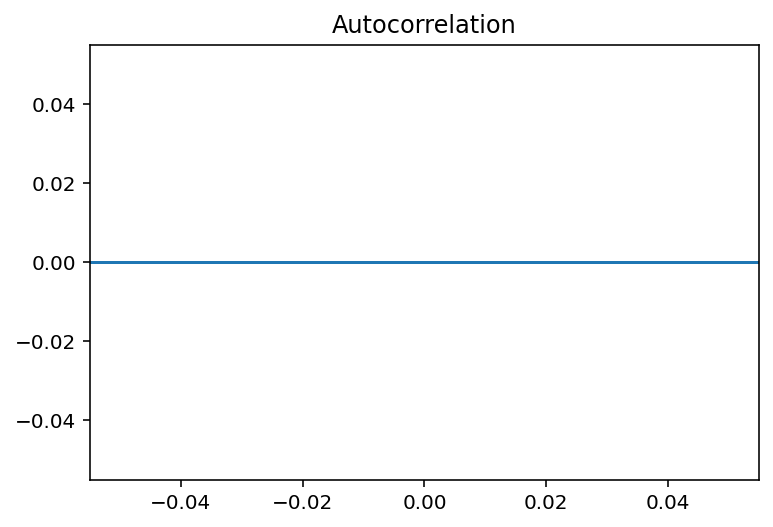

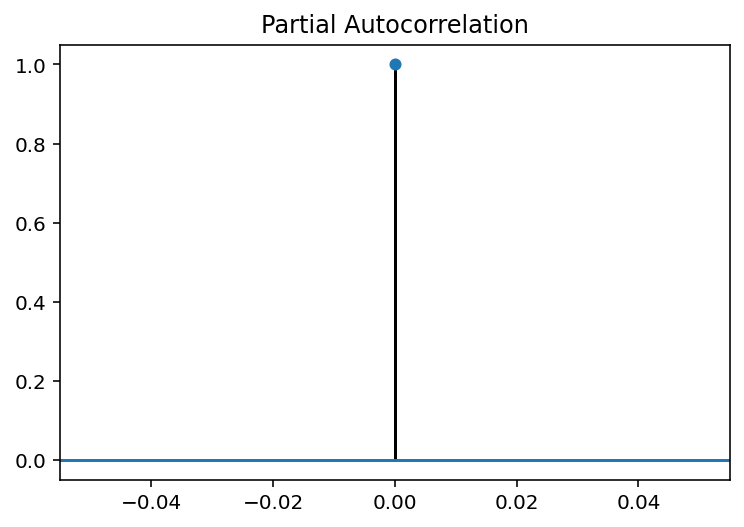

In [8]:


plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

In [9]:
# p = 1, q =0

## d

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


NameError: name 'augmented_dickey_fuller_test' is not defined

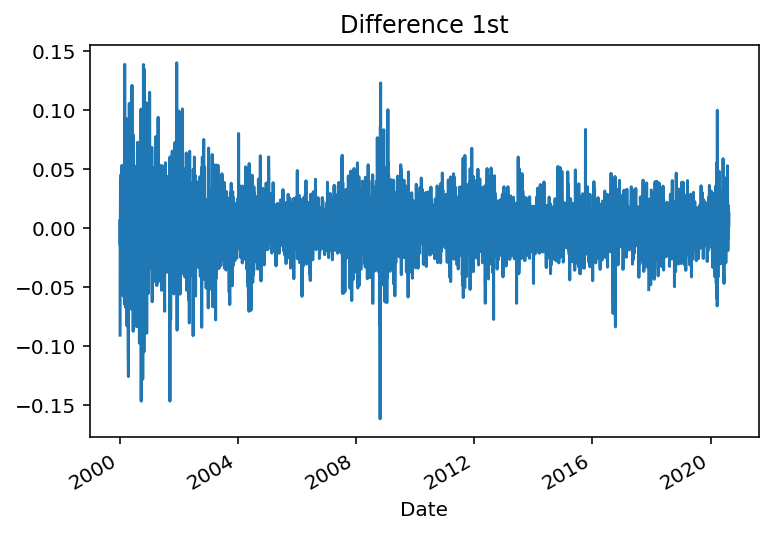

In [10]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Date
2000-01-06    0.097881
2000-01-07   -0.021480
2000-01-10    0.055015
2000-01-11   -0.040678
2000-01-12   -0.008703
                ...   
2020-08-07   -0.027806
2020-08-10    0.013862
2020-08-11    0.001693
2020-08-12    0.006756
2020-08-13   -0.011959
Name: Close, Length: 5185, dtype: float64


NameError: name 'augmented_dickey_fuller_test' is not defined

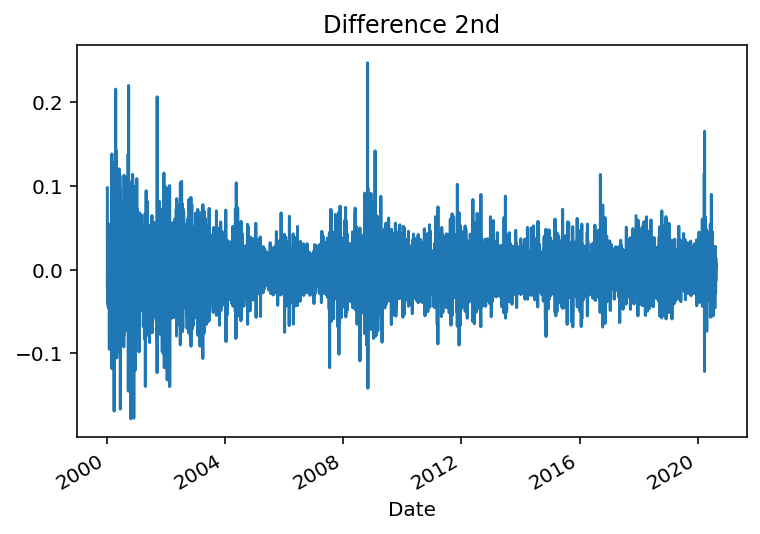

In [11]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
print(diff_2)
diff_2.plot(title='Difference 2nd')


augmented_dickey_fuller_test(diff_2)

# d=2 or 1부터

## train -test data spilt

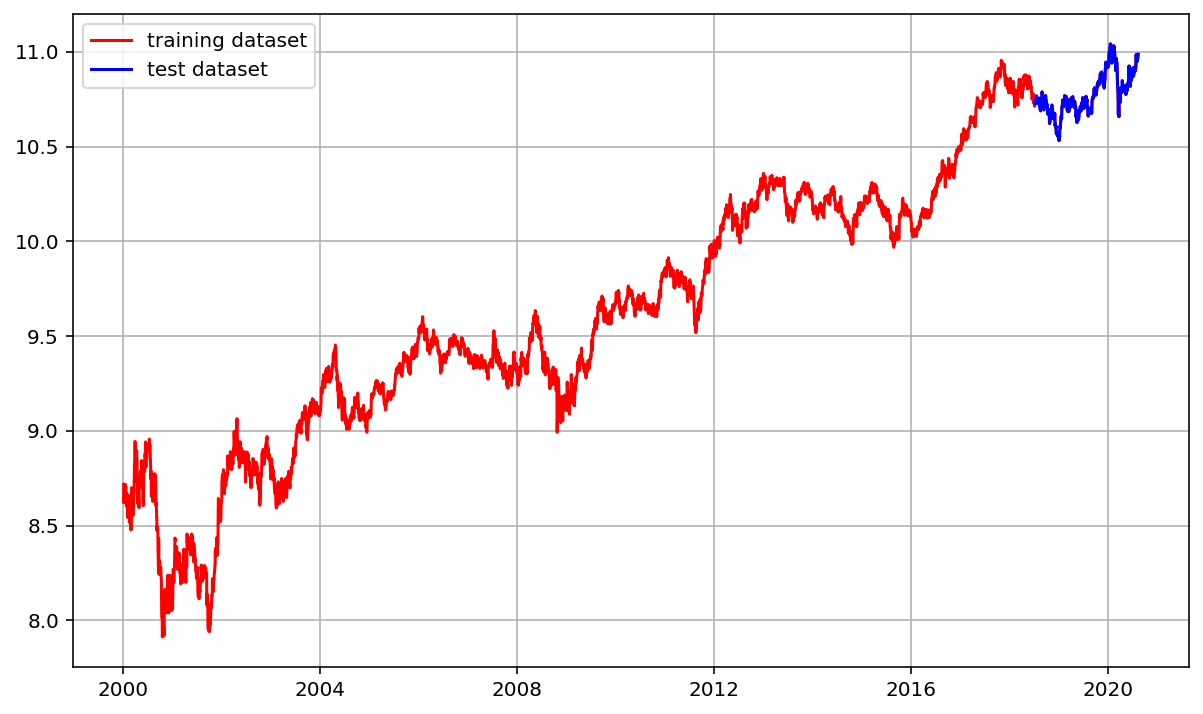

In [12]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [13]:
# data set check
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2000-01-04    8.717682
2000-01-05    8.626944
Name: Close, dtype: float64
(4668,)
(519,)


## Arima Model 

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(0, 1, 8))   # p d q
fitted_m = model.fit(disp=-1)  #disp info print 여부.
print(fitted_m.summary())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


LinAlgError: Array must not contain infs or NaNs

In [15]:
fitted_m.plot_predict()

NameError: name 'fitted_m' is not defined

In [16]:
test_data

Date
2018-07-09    10.727663
2018-07-10    10.742897
2018-07-11    10.736397
2018-07-12    10.725468
2018-07-13    10.747208
                ...    
2020-08-07    10.959540
2020-08-10    10.964744
2020-08-11    10.971641
2020-08-12    10.985293
2020-08-13    10.986986
Name: Close, Length: 519, dtype: float64

In [17]:
# 데이터 구간
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
#   step , 
# alpha 


# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

NameError: name 'fitted_m' is not defined

## 오차율 계산

In [18]:
#


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

NameError: name 'fc' is not defined